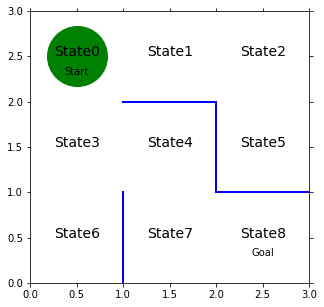

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='blue', linewidth=2)
plt.plot([1, 2], [2, 2], color='blue', linewidth=2)
plt.plot([2, 2], [2, 1], color='blue', linewidth=2)
plt.plot([2, 3], [1, 1], color='blue', linewidth=2)

plt.text(0.5, 2.5, 'State0', size=14, ha='center')
plt.text(1.5, 2.5, 'State1', size=14, ha='center')
plt.text(2.5, 2.5, 'State2', size=14, ha='center')
plt.text(0.5, 1.5, 'State3', size=14, ha='center')
plt.text(1.5, 1.5, 'State4', size=14, ha='center')
plt.text(2.5, 1.5, 'State5', size=14, ha='center')
plt.text(0.5, 0.5, 'State6', size=14, ha='center')
plt.text(1.5, 0.5, 'State7', size=14, ha='center')
plt.text(2.5, 0.5, 'State8', size=14, ha='center')
plt.text(0.5, 2.3, 'Start', ha='center')
plt.text(2.5, 0.3, 'Goal', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [16]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # 0
                    [np.nan, 1, np.nan, 1],  # 1
                    [np.nan, np.nan, 1, 1],  # 2
                    [1, 1, 1, np.nan],  # 3
                    [np.nan, np.nan, 1, 1],  # 4
                    [1, np.nan, np.nan, np.nan],  # 5
                    [1, np.nan, np.nan, np.nan],  # 6
                    [1, 1, np.nan, np.nan],  # 7
                    ])

In [17]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape  
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  
    pi = np.nan_to_num(pi) 
    return pi

In [18]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [19]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [20]:
[a, b] = theta_0.shape  
Q = np.random.rand(a, b) * theta_0 * 0.1

In [21]:
def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

In [22]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  

    if next_direction == "up":
        s_next = s - 3  
    elif next_direction == "right":
        s_next = s + 1  
    elif next_direction == "down":
        s_next = s + 3  
    elif next_direction == "left":
        s_next = s - 1 

    return s_next

In [23]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):

    if s_next == 8:  
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])

    return Q

In [24]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  
    a = a_next = get_action(s, Q, epsilon, pi)  
    s_a_history = [[0, np.nan]]  

    while (1):  
        a = a_next  

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])
 
        if s_next == 8:
            r = 1  
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)

        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

        if s_next == 8: 
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [25]:
eta = 0.1  
gamma = 0.9 
epsilon = 0.5 
v = np.nanmax(Q, axis=1)  
is_continue = True
episode = 1

V = []  
V.append(np.nanmax(Q, axis=1)) 

while is_continue: 
    print("エピソード:" + str(episode))

    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)


    new_v = np.nanmax(Q, axis=1)  
    print(np.sum(np.abs(new_v - v)))  
    v = new_v
    V.append(v) 

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    episode = episode + 1
    if episode > 20:
        break

エピソード:1
0.07921218036723131
迷路を解くのにかかったステップ数は86です
エピソード:2
0.14944006639153223
迷路を解くのにかかったステップ数は174です
エピソード:3
0.10031561046049027
迷路を解くのにかかったステップ数は56です
エピソード:4
0.09531257431653656
迷路を解くのにかかったステップ数は8です
エピソード:5
0.09358934115718424
迷路を解くのにかかったステップ数は6です
エピソード:6
0.0924784437647828
迷路を解くのにかかったステップ数は4です
エピソード:7
0.09149118831821157
迷路を解くのにかかったステップ数は4です
エピソード:8
0.09046530185908279
迷路を解くのにかかったステップ数は4です
エピソード:9
0.08939212709847277
迷路を解くのにかかったステップ数は4です
エピソード:10
0.08826348870119051
迷路を解くのにかかったステップ数は4です
エピソード:11
0.08707227319121506
迷路を解くのにかかったステップ数は4です
エピソード:12
0.08581278646999052
迷路を解くのにかかったステップ数は4です
エピソード:13
0.0844809420460245
迷路を解くのにかかったステップ数は4です
エピソード:14
0.08307432281026625
迷路を解くのにかかったステップ数は4です
エピソード:15
0.08159215067901543
迷路を解くのにかかったステップ数は4です
エピソード:16
0.08003519138980816
迷路を解くのにかかったステップ数は4です
エピソード:17
0.07840561594163449
迷路を解くのにかかったステップ数は4です
エピソード:18
0.07670683541960945
迷路を解くのにかかったステップ数は4です
エピソード:19
0.0749433220664291
迷路を解くのにかかったステップ数は4です
エピソード:20
0.07312042631479584
迷路を解くのにかかったステップ数は4です
